In [243]:
import pandas as pd
import numpy as np
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt

In [244]:
# tickers = ['AZN', 'GSK', 'HSBA', 'BP', 'SHEL', 'BARC', 'LSEG', 'RIO', 'BATS', 'REL', 'DGE']
# tickers = [ticker + '.L' for ticker in tickers]

tickers = ['AZN.L','GSK.L','BP.L']


endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(1*365)

returnsData = yf.download(tickers,start=startDate,end=endDate,interval='1d')
returnsData = returnsData['Adj Close']

[*********************100%***********************]  3 of 3 completed


In [245]:
portfolioReturns = returnsData.pct_change().dropna()

In [246]:
class MeanVarianceOptimisation:
    def __init__(self, portfolioReturns, numPortfolios=10000, riskFreeRate=0.04):
        self.portfolioReturns = portfolioReturns
        self.meanReturns = portfolioReturns.mean()
        self.covReturns = portfolioReturns.cov()
        self.numPortfolios = numPortfolios
        self.numStocks = len(portfolioReturns.columns)
        self.results = np.zeros((3, numPortfolios))
        self.weights = np.zeros((numStocks, numPortfolios))
        self.riskFreeRate = riskFreeRate
        self.tickers = portfolioReturns.columns
    
    
    def generatePortfolios(self):
        for j in range(self.numPortfolios):
            randomWeights = np.random.random(self.numStocks)
            randomWeights /= np.sum(randomWeights)
            self.weights[:,j] = randomWeights
            pfReturns = np.sum(self.meanReturns*randomWeights) * 252
            portfolioStdev = np.sqrt(np.dot(randomWeights.T, np.dot(self.covReturns, randomWeights))) * np.sqrt(252)
            self.results[0,j] = portfolioStdev
            self.results[1,j] = pfReturns
            self.results[2,j] = (self.results[1,j] - self.riskFreeRate) / self.results[0,j]

        optimalSharpeLoc = np.argmax(self.results[2,:])
        self.optimalSharpe = self.results[2,optimalSharpeLoc]
        self.optimalReturn = self.results[1,optimalSharpeLoc]
        self.optimalVolatility = self.results[0, optimalSharpeLoc]
        self.optimalWeights = self.weights[:, optimalSharpeLoc]

    
    def plot(self):
        plt.scatter(self.results[0,:], self.results[1,:], c=self.results[2,:], cmap='viridis',marker='o')
        plt.scatter(self.optimalVolatility,self.optimalReturn,c='red',marker='x',label='Optimal Portfolio')
        plt.title('Efficient Frontier')
        plt.xlabel('Volatility')
        plt.ylabel('Returns')
        plt.colorbar(label='Sharpe Ratio')
        plt.show()

    def getWeights(self):
        paired_weights = list(zip(tickers, self.optimalWeights))
        for ticker, weight in paired_weights:
            print(f"{ticker}: {weight*100:.1f}%")

In [247]:
test = MeanVarianceOptimisation(portfolioReturns)

In [248]:
test.generatePortfolios()

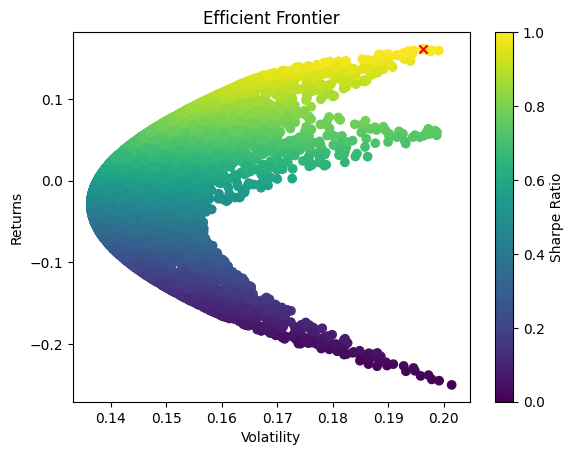

In [249]:
test.plot()

In [250]:
test.getWeights()

AZN.L: 95.6%
GSK.L: 0.1%
BP.L: 4.3%
